### Contexto
"Preveja o comportamento para reter clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas focados na retenção de clientes." [Conjuntos de dados de amostra da IBM]

### Contente
Cada linha representa um cliente, cada coluna contém os atributos do cliente descritos na coluna Metadados.

O conjunto de dados inclui informações sobre:

Clientes que saíram no último mês - a coluna é chamada de rotatividade
Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes
Informações da conta do cliente - há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes

Dados Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

In [ ]:
!pip install pipelinehelper

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from pipelinehelper import PipelineHelper
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import f1_score 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
#Visualização dos dados
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


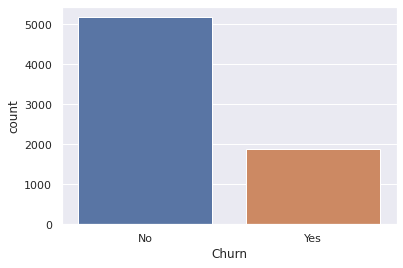

In [ ]:
df['Churn'].value_counts()
sns.countplot(df['Churn'])

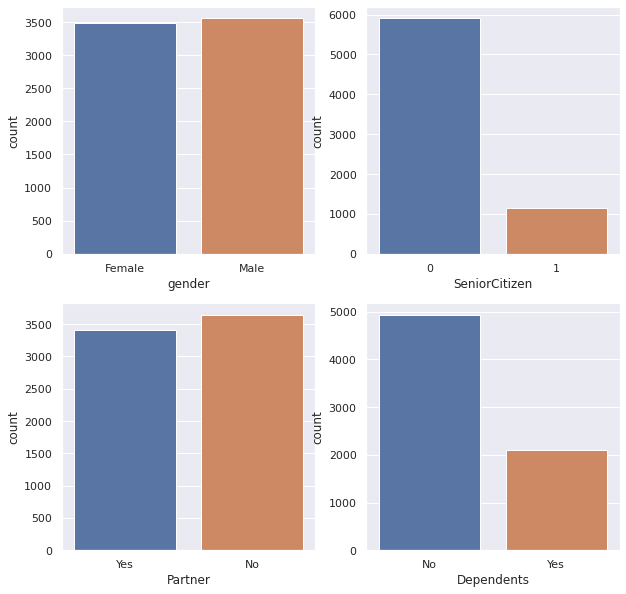

In [ ]:
f, ax = plt.subplots(2,2, figsize=(10,10))

sns.countplot(df['gender'], ax=ax[0,0])
sns.countplot(df['SeniorCitizen'], ax=ax[0,1])
sns.countplot(df['Partner'], ax=ax[1,0])
sns.countplot(df['Dependents'], ax=ax[1,1])

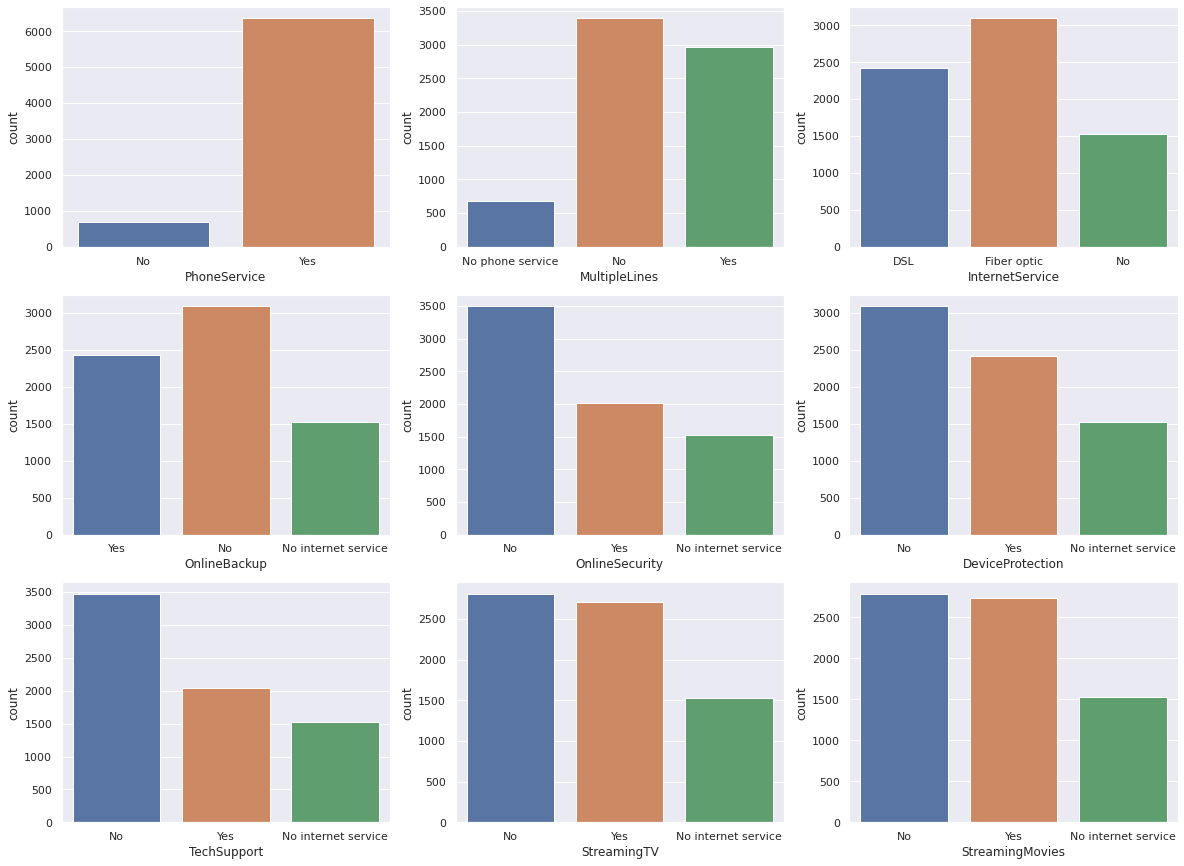

In [ ]:
f, ax = plt.subplots(3,3, figsize=(20,15))

sns.countplot(df['PhoneService'], ax=ax[0,0])
sns.countplot(df['MultipleLines'], ax=ax[0,1])
sns.countplot(df['InternetService'], ax=ax[0,2])
sns.countplot(df['OnlineBackup'], ax=ax[1,0])
sns.countplot(df['OnlineSecurity'], ax=ax[1,1])
sns.countplot(df['DeviceProtection'], ax=ax[1,2])
sns.countplot(df['TechSupport'], ax=ax[2,0])
sns.countplot(df['StreamingTV'], ax=ax[2,1])
sns.countplot(df['StreamingMovies'], ax=ax[2,2])



#Pré-processamento dos dados

In [ ]:
#remover feature
df.drop(['customerID'], axis=1, inplace=True)

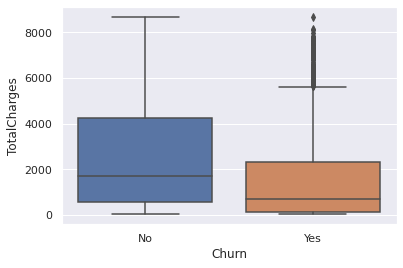

In [ ]:
#Converter algumas variaveis string para númerica
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df.isna().sum()
df.dropna(inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

sns.boxplot('Churn', 'TotalCharges', data=df)

In [ ]:
#converter as labels yes/no em 1/0
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

df['SeniorCitizen'].replace(1, 'Yes', inplace=True)
df['SeniorCitizen'].replace(0, 'No', inplace=True)

df_onehot = pd.get_dummies(df)
df_onehot.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
#scaler
scaler=MinMaxScaler()
df_onehot['tenure'] = scaler.fit_transform(df_onehot['tenure'].values.reshape(-1,1))
df_onehot['MonthlyCharges'] = scaler.fit_transform(df_onehot['MonthlyCharges'].values.reshape(-1,1))
df_onehot['TotalCharges'] = scaler.fit_transform(df_onehot['TotalCharges'].values.reshape(-1,1))

In [ ]:
# Split dataset
X = df_onehot.drop(['Churn'], axis=1).values
y = df_onehot['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Contrução máquinas preditivas

In [ ]:
columns = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
index = ['KNN', 'SVM', 'DT', 'RF','XGB', 'MLP', 'PER', 'GB']

In [ ]:
result = pd.DataFrame(columns=columns, index=index)
result

,Accuracy,Precision,Recall,F1_Score
KNN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN
DT,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN
XGB,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN
PER,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN


In [ ]:
#result.loc['KNN', 'Accuracy'] = accuracy_score(y_test,y_knn)
#result.loc['KNN', 'Precision'] = precision_score(y_test,y_knn)
#result.loc['KNN', 'Recall'] = recall_score(y_test,y_knn)
#result.loc['KNN', 'F1_Score'] = f1_score(y_test, y_knn)

In [ ]:
#result

# GridSearch

### Instanciando os modelos

In [ ]:
knn = KNeighborsClassifier()
svc = svm.SVC(random_state=73)
nb = naive_bayes.GaussianNB()
per = Perceptron(random_state=73)
mlp = MLPClassifier(random_state=73)
dt = DecisionTreeClassifier(random_state=73)
rf = RandomForestClassifier(random_state=73)
gb = GradientBoostingClassifier(random_state=73)

modelos = [knn, svc, nb, per, mlp, dt, rf, gb]

In [ ]:
param_knn = {'kneighborsclassifier__n_neighbors': np.arange(1,16),
             'kneighborsclassifier__weights':['uniform', 'distance'],
             'kneighborsclassifier__metric': ['manhattan', 'minkowski']}
param_svc = {'svc__C': np.logspace(-3,3,7),
             'svc__kernel': ['rbf','sigmoid'],
             'svc__gamma': ['scale', 'auto']}
param_nb = {'gaussiannb__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

param_per = {'perceptron__max_iter': [1000,1500,2000],
             'perceptron__tol':np.logspace(-5,0,6),
             'perceptron__eta0': [0.5,0.75,1]}

param_mlp = {'mlpclassifier__hidden_layer_sizes': [100, 150, 175, 200],
             'mlpclassifier__activation': ['tanh', 'relu']}

param_dt = {'decisiontreeclassifier__max_depth': [3,4,5,6,8,10,12],
            'decisiontreeclassifier__min_samples_leaf': [7,10,12,15,20]}

param_rf = {'randomforestclassifier__n_estimators': [100,150,200],
            'randomforestclassifier__max_depth': [4,5,6,7],
            'randomforestclassifier__min_samples_leaf': [8,10,11,12]}

param_gb = {'gradientboostingclassifier__learning_rate': [0.01,0.1,0.25,0.5]}

params_classifier = [param_knn,param_svc,param_nb,param_per,param_mlp,param_dt,param_rf,param_gb]

In [ ]:
std = StandardScaler()
grid_results = []

labels = ['KNN', 'SVC', 'NB', 'PER', 'MLP','DT', 'RF', 'GB']

for model, params, label in zip(modelos, params_classifier, labels):
  pipe = pipeline.make_pipeline(std, model)
  gridSearch = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1, return_train_score=False, scoring='f1_weighted', cv=5)
  gs = gridSearch.fit(X_train,y_train)
  print(f'Modelo: {label}')
  print(f'Melhor F1-Score: {gs.best_score_}')
  print(f'Melhor parâmetros: {gs.best_params_}')
  print("\n------------------------------------------------------------\n")

  grid_resultado = {'Model': label, 'Params': gs.best_params_, 'F1-Score': gs.best_score_}
  grid_results.append(grid_resultado)

Modelo: KNN
Melhor F1-Score: 0.7761917538425128
Melhor parâmetros: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'uniform'}

------------------------------------------------------------

Modelo: SVC
Melhor F1-Score: 0.7921164070629739
Melhor parâmetros: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid'}

------------------------------------------------------------

Modelo: NB
Melhor F1-Score: 0.7178466480531811
Melhor parâmetros: {'gaussiannb__var_smoothing': 1e-08}

------------------------------------------------------------

Modelo: PER
Melhor F1-Score: 0.7421355504304381
Melhor parâmetros: {'perceptron__eta0': 1, 'perceptron__max_iter': 1000, 'perceptron__tol': 0.1}

------------------------------------------------------------

Modelo: MLP
Melhor F1-Score: 0.7731861681082549
Melhor parâmetros: {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': 100}

----------------------

In [ ]:
result = pd.DataFrame(grid_results).sort_values(by='F1-Score', ascending=False)
result

NameError: ignored

In [17]:
#gb = GradientBoostingClassifier(**result['Params'][0], random_state=73)

gb = GradientBoostingClassifier(learning_rate=0.1, random_state=73)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# Usando PipelineHelper

In [ ]:
pipe = Pipeline([
      ('scaler', PipelineHelper([
        ('std', StandardScaler()),
      ])),
      ('classifier', PipelineHelper([
         ('knn', knn),
         ('svc', svc),
         ('nb', nb),
         ('per',per),
         ('mlp', mlp),
         ('dt', dt),
         ('rf', rf),
         ('gb', gb),
      ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_std': [True],
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'knn__n_neighbors': np.arange(1,16),
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['manhattan', 'minkowski'],
        'svc__C': np.logspace(-3,3,7),
        'svc__kernel': ['rbf', 'sigmoid'],
        'svc__gamma': ['scale', 'auto'],
        'nb__var_smoothing': np.logspace(0,-9, num=100),
        'per__max_iter': [1000,1500,2000],
        'per__tol': np.logspace(-5,0,6),
        'per__eta0': [0.5,0.75,1],
        'mlp__hidden_layer_sizes': [100,150,175,200],
        'mlp__activation':['tanh', 'relu'],
        'dt__max_depth': [3,4,5,6,8,10,12],
        'dt__min_samples_leaf': [7,10,12,15,20],
        'rf__n_estimators': [100,150,200],
        'rf__max_depth': [4,5,6,7],
        'rf__min_samples_leaf': [8,10,11,12],
        'gb__learning_rate': [0.01,0.1,0.25,0.5],
        'gb__loss' : ["deviance"],
        'gb__n_estimators' : [100,200,300],
        'gb__max_depth': [4, 8],
        'gb__min_samples_leaf': [100,150],
        'gb__max_features': [0.3, 0.1] 
    })
}

grid = GridSearchCV(pipe, params, return_train_score=False, scoring='f1_weighted',cv=5, n_jobs=-1)
gs = grid.fit(X_train,y_train)

print("\n--------------------------------\n")
print(gs.best_params_)
print(gs.best_score_)
print("\n---------------------------------\n")


--------------------------------

{'classifier__selected_model': ('gb', {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 100}), 'scaler__selected_model': ('std', {'with_std': True})}
0.7965319812567893

---------------------------------



In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.1,loss='deviance', max_depth=4, max_features=0.3, min_samples_leaf=150, n_estimators=100 )
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

